## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/rexionmars/space/OpenSource/yolo-cow-finetune


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)
Setup complete ✅ (12 CPUs, 23.2 GB RAM, 159.9/254.0 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="vAEx3j7cOgLv4GtMzmPv")
project = rf.workspace("thesis-3c51t").project("cow-counting")
dataset = project.version(12).download("yolov8")

/home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets


/home/rexionmars/space/OpenSource/yolo-cow-finetune/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cow-counting-12 in yolov8:: 100%|██████████| 6754/6754 [00:00<00:00, 25187.23it/s]


## Custom Training

In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True batch=6

/home/rexionmars/space/OpenSource/yolo-cow-finetune
New https://pypi.org/project/ultralytics/8.2.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-counting-12/data.yaml, epochs=50, patience=50, batch=6, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save

In [19]:
!ls {HOME}/runs/detect/train5/

args.yaml			 R_curve.png	       train_batch2.jpg
confusion_matrix_normalized.png  results.csv	       val_batch0_labels.jpg
confusion_matrix.png		 results.png	       val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch15880.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch15881.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch15882.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch1.jpg      weights


/home/rexionmars/space/OpenSource/yolo-cow-finetune


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


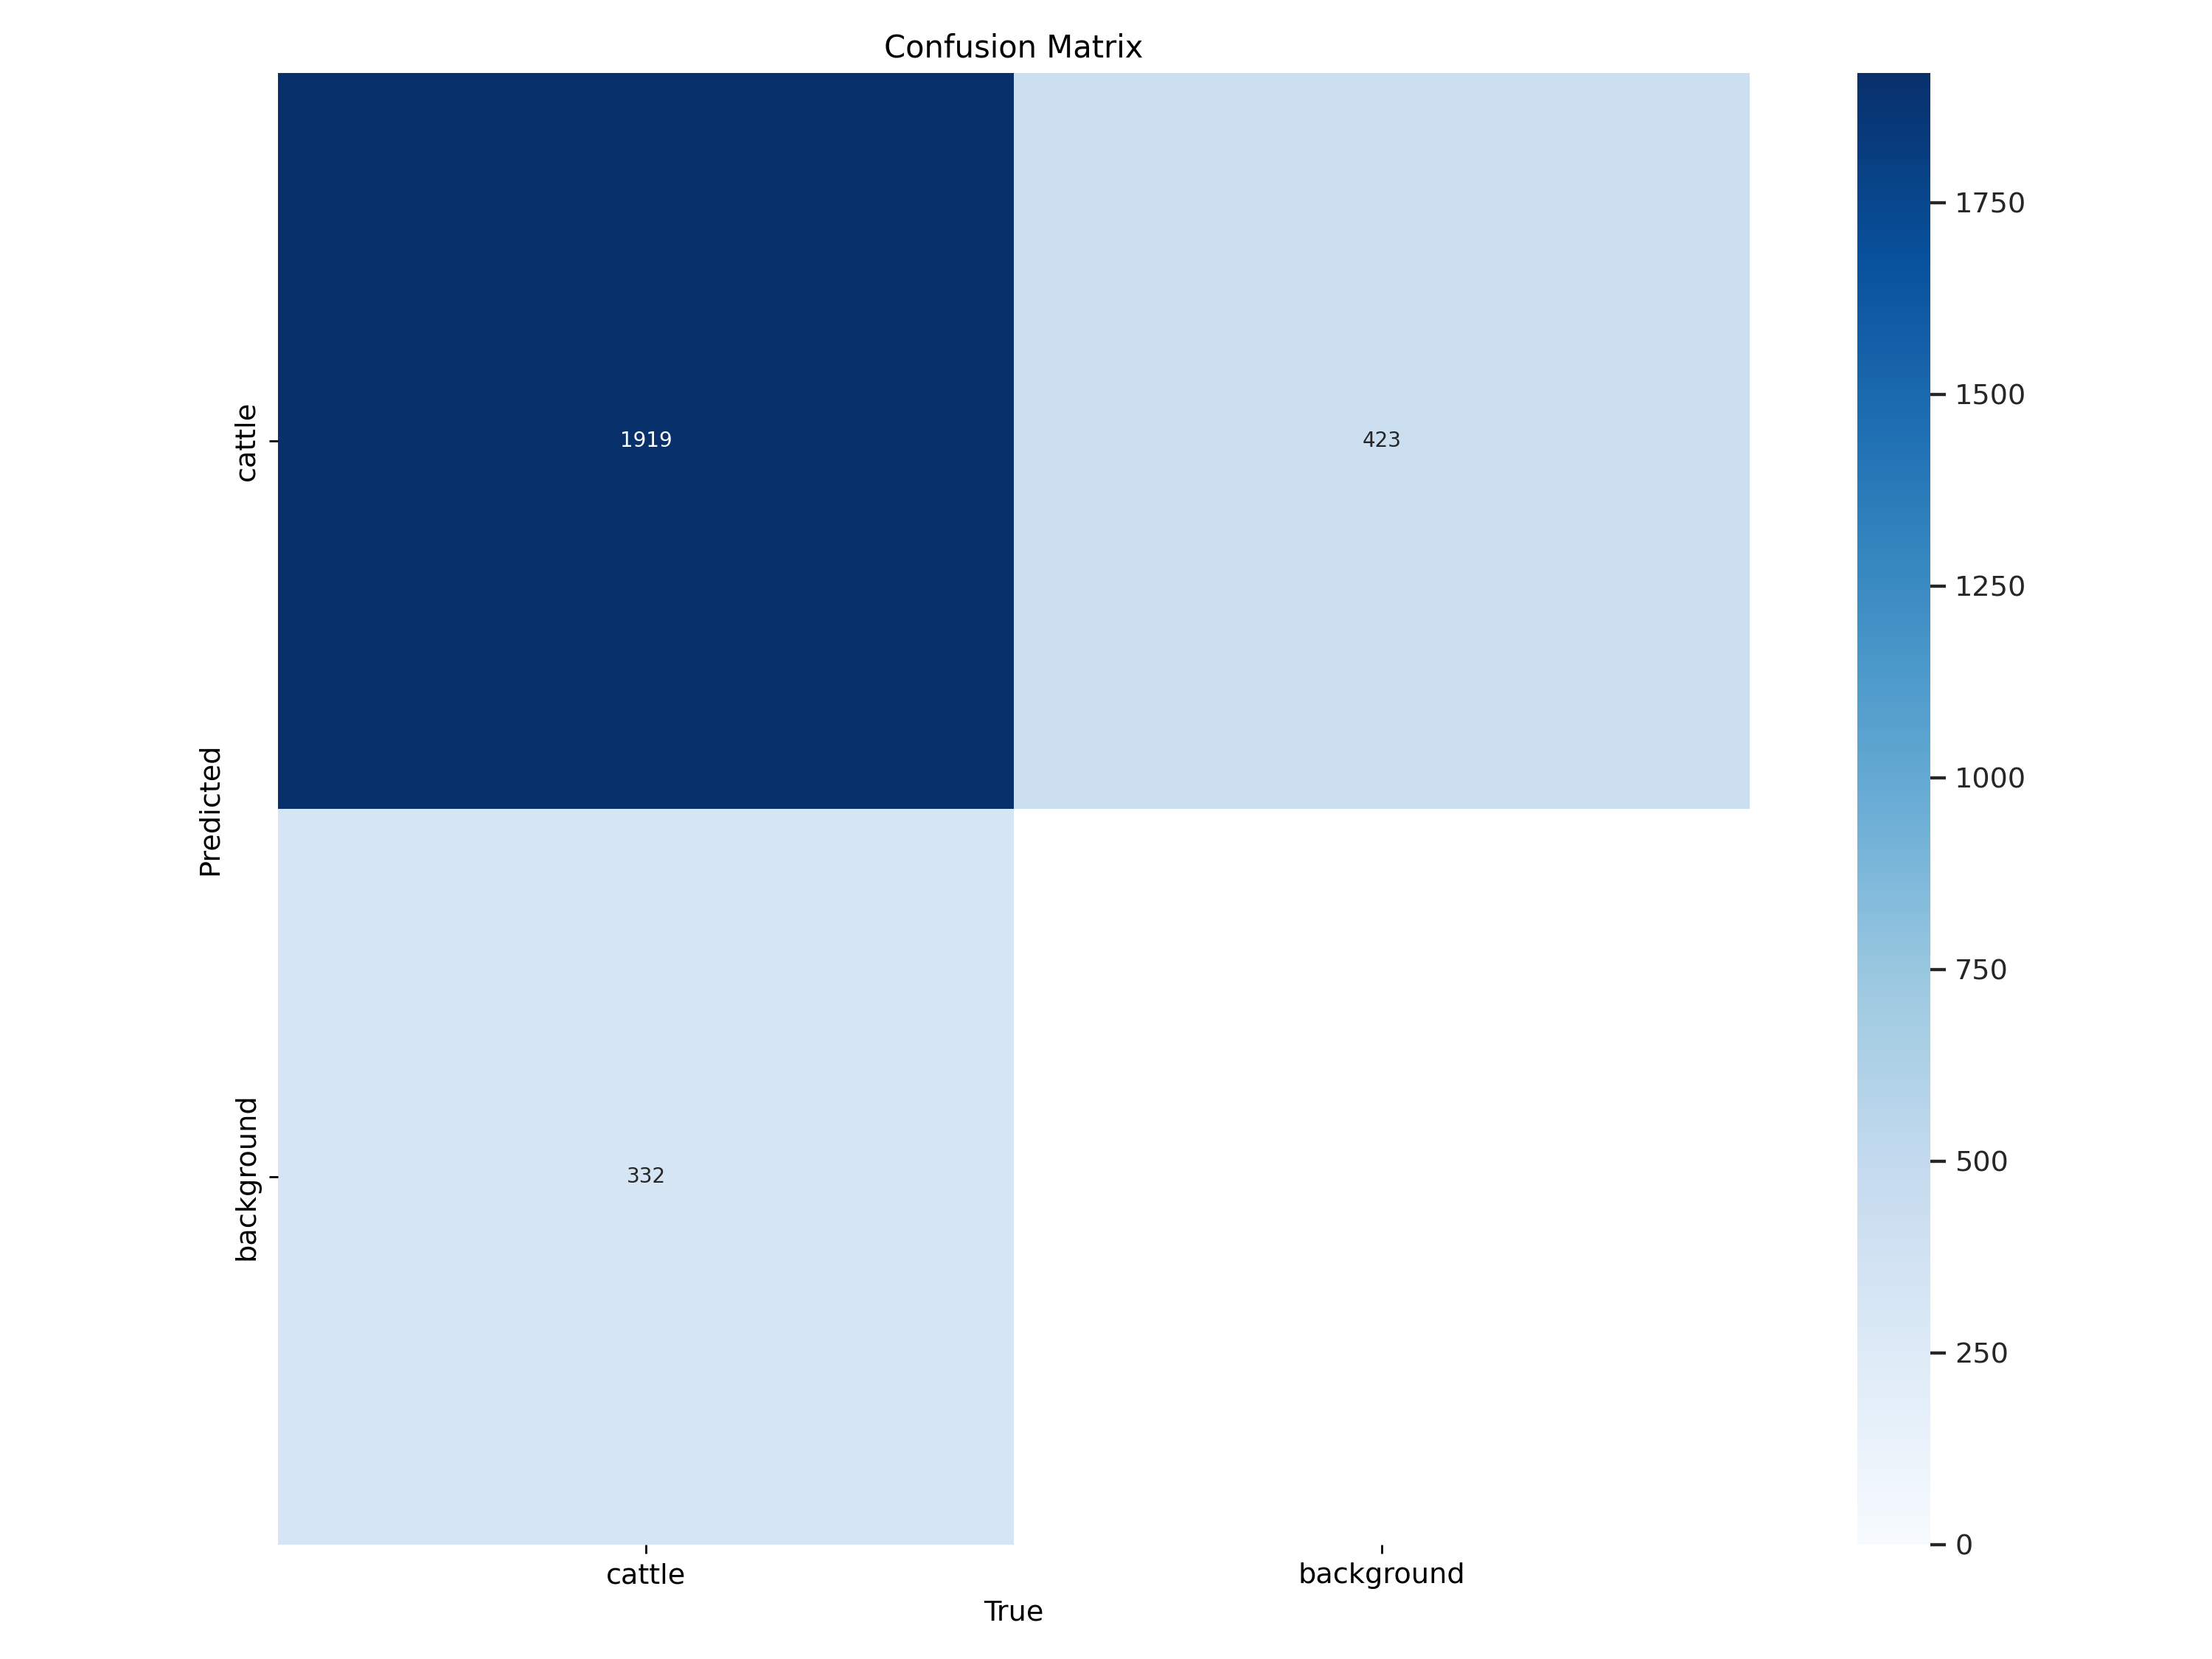

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

/home/rexionmars/space/OpenSource/yolo-cow-finetune


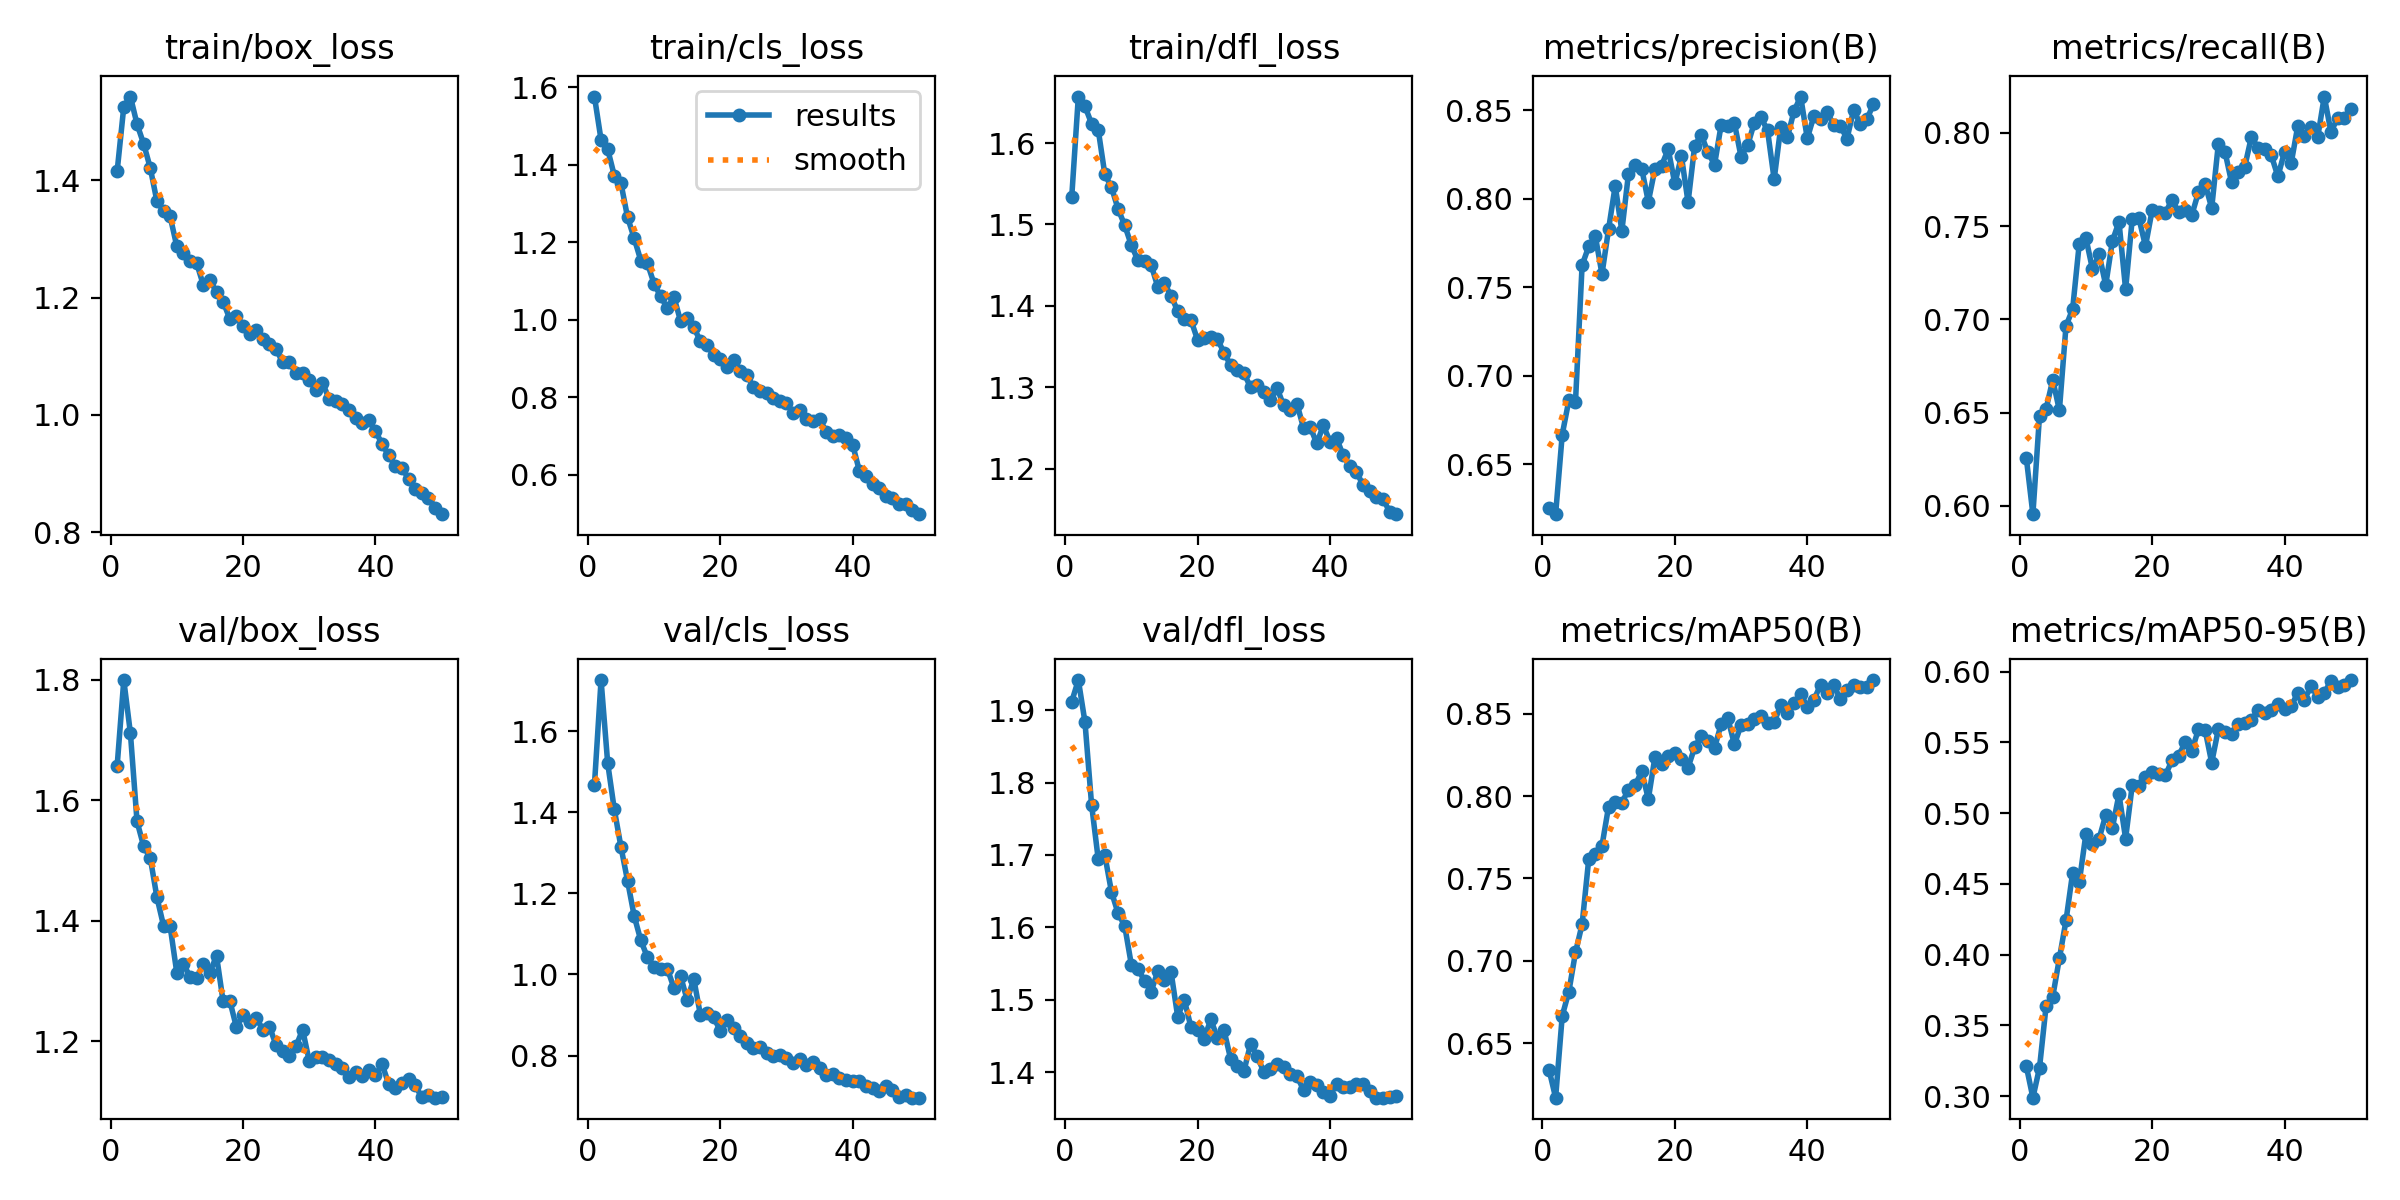

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/home/rexionmars/space/OpenSource/yolo-cow-finetune


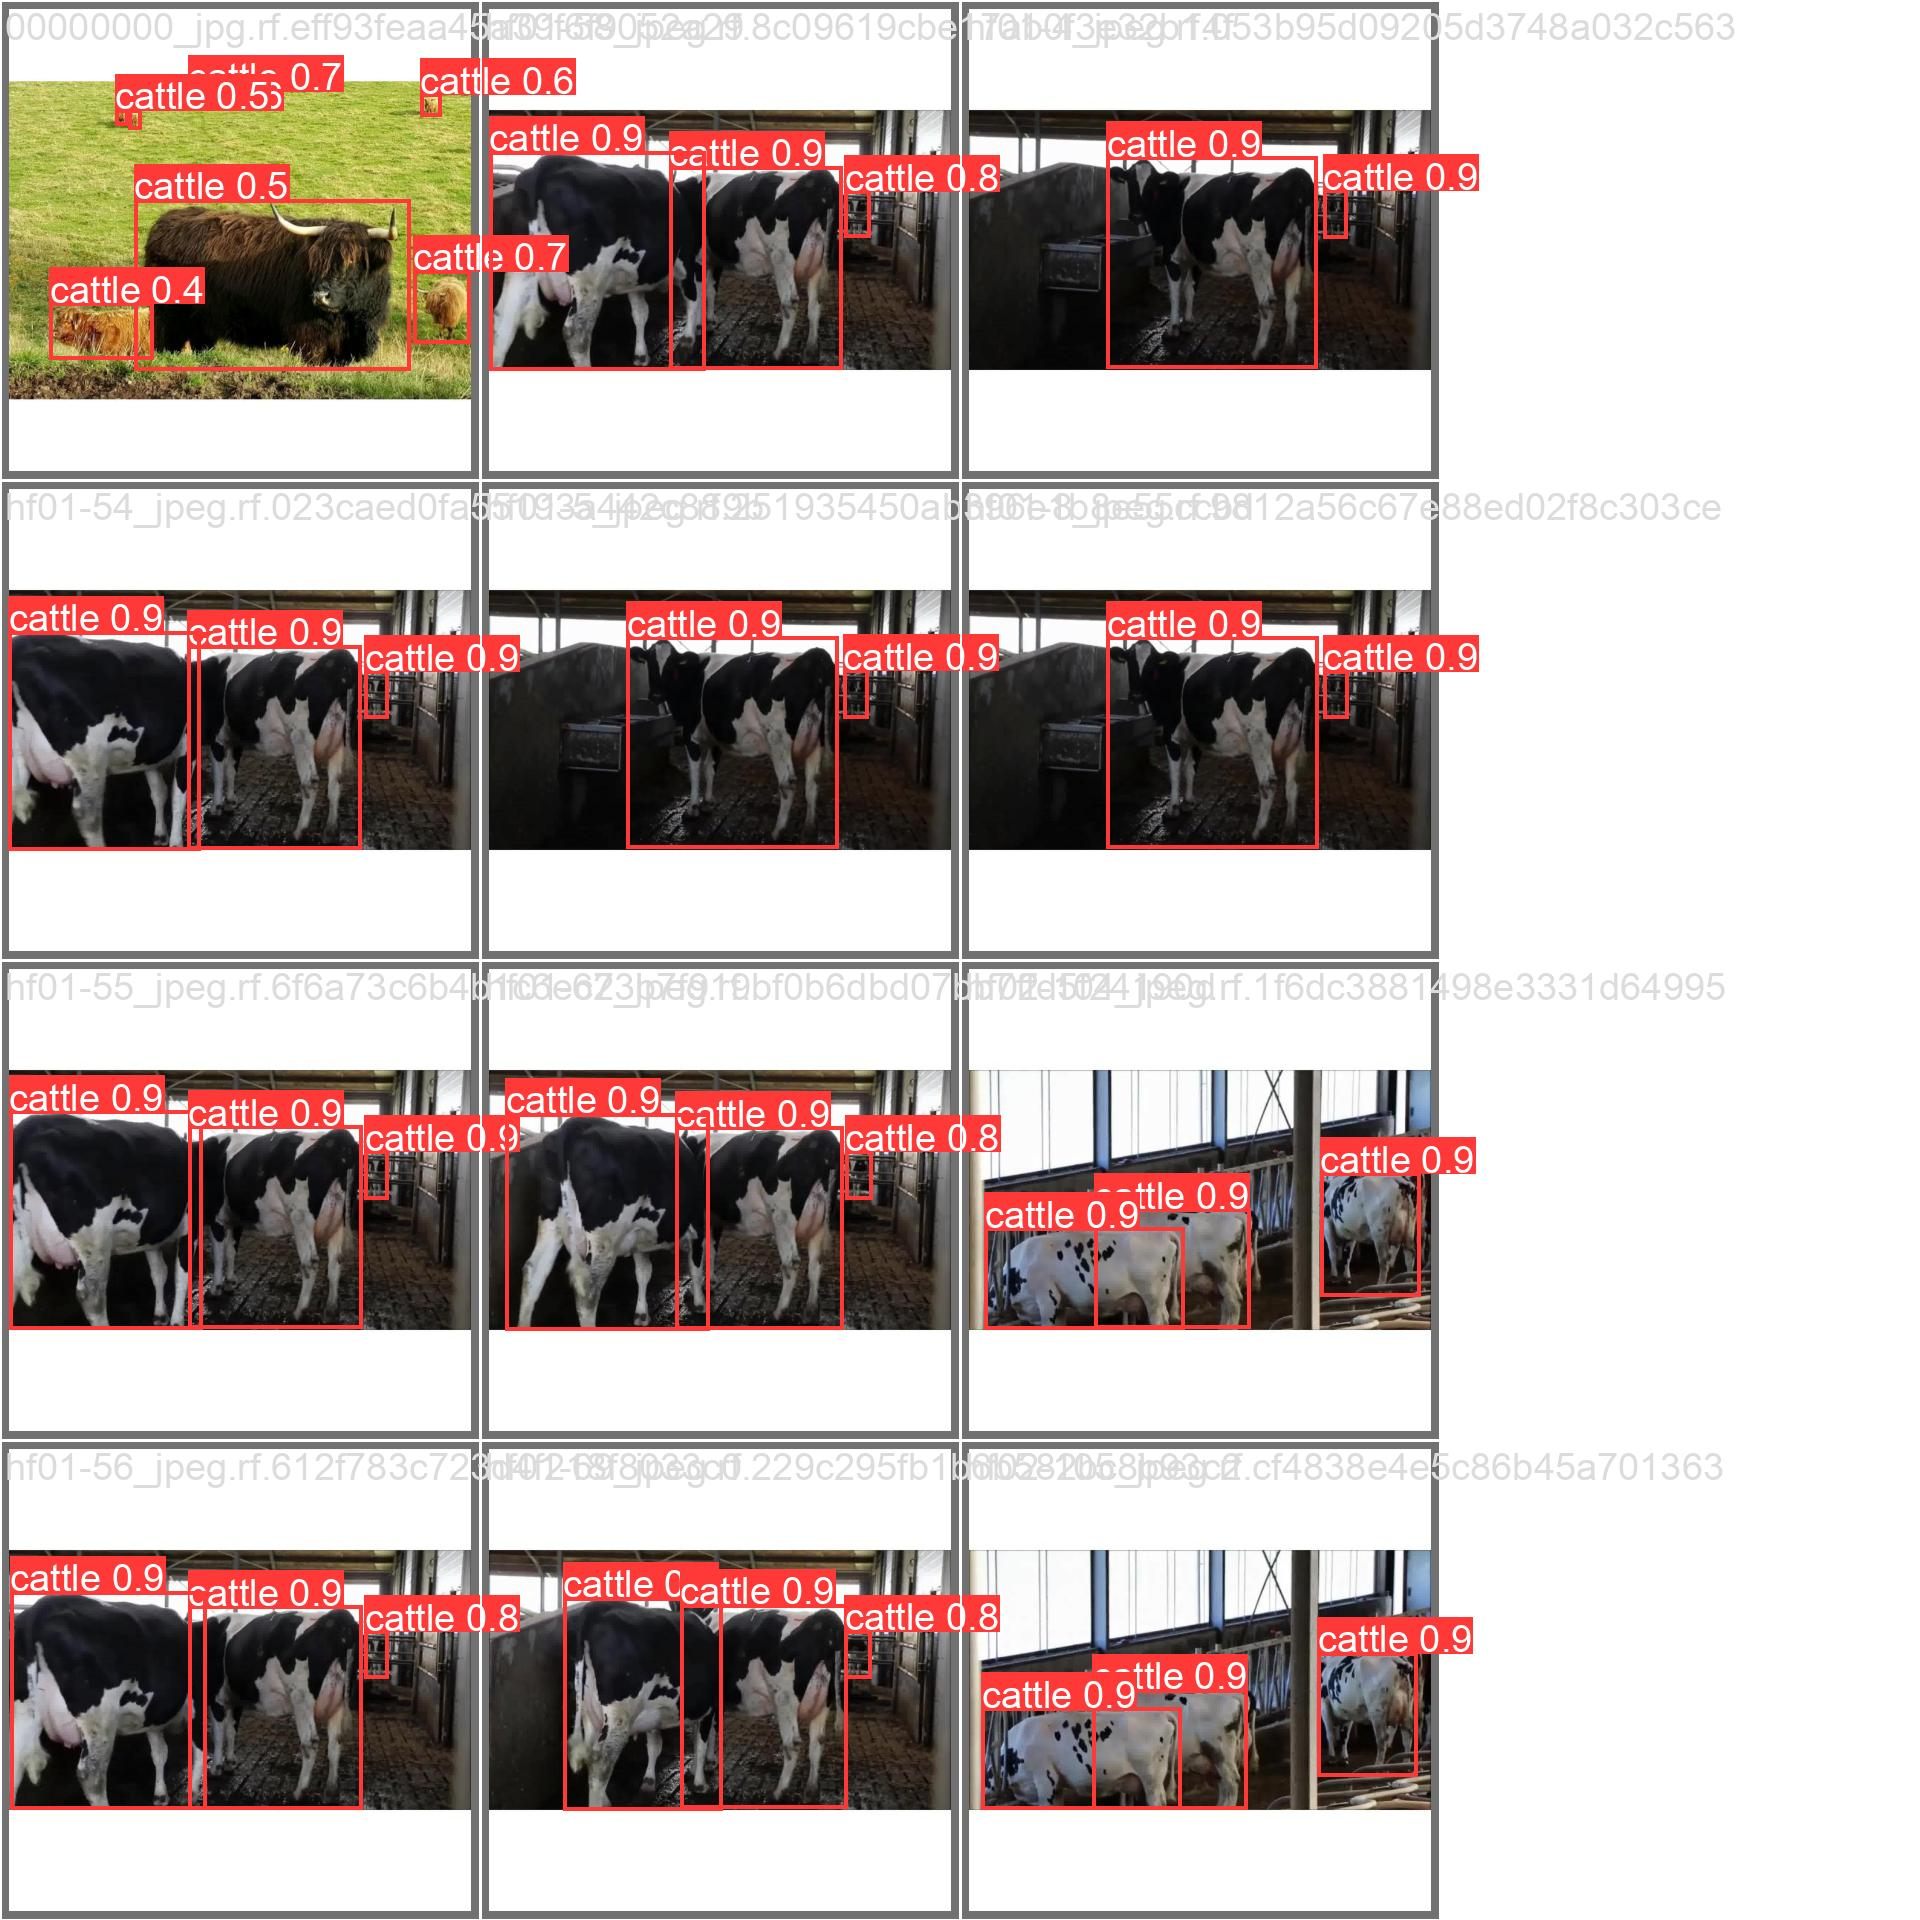

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

/home/rexionmars/space/OpenSource/yolo-cow-finetune


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-c
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        660       2251      0.853      0.813       0.87      0.594
Speed: 0.7ms preprocess, 16.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/rexionmars/space/OpenSource/yolo-cow-finetune
Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/330 /home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-counting-12/test/images/00000005_jpg.rf.c88dff4ee2e963799cbcbfbc3116a671.jpg: 800x800 1 cattle, 19.7ms
image 2/330 /home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-counting-12/test/images/00000012_jpg.rf.2ff6c19c8b418c7625eed4b56c9feef4.jpg: 800x800 4 cattles, 18.6ms
image 3/330 /home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-counting-12/test/images/00000013_jpg.rf.b8cd0124bfde16896e8b4b7564b04fa4.jpg: 800x800 1 cattle, 19.6ms
image 4/330 /home/rexionmars/space/OpenSource/yolo-cow-finetune/datasets/cow-counting-12/test/images/00000014_jpg.rf.77ba560851c92447a4acf8d08716a49e.jpg: 800x800 1 cattle, 20.0ms
image 5/330 /home/rexionmars/spac

**NOTE:** Let's take a look at few results.

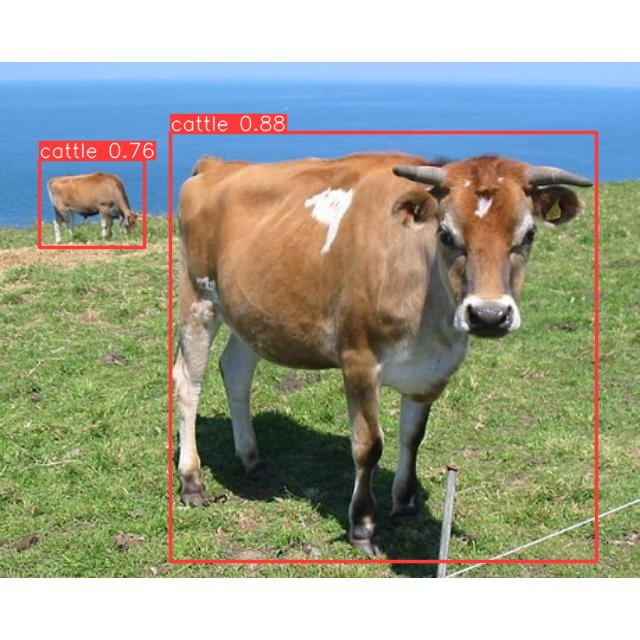

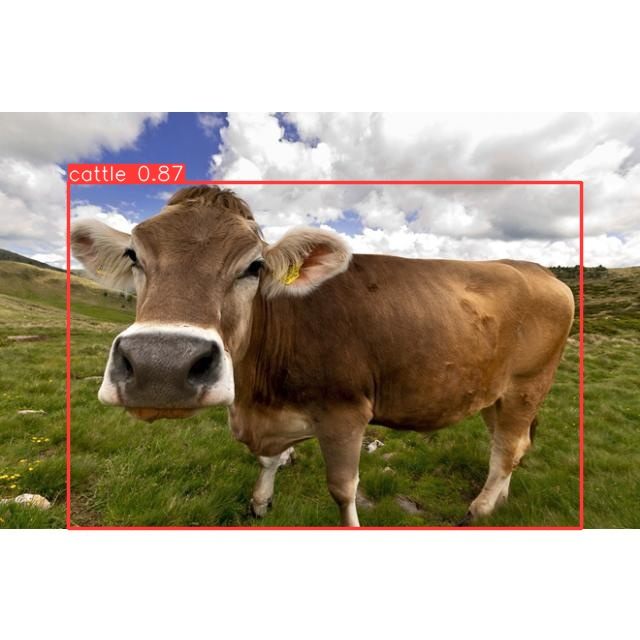

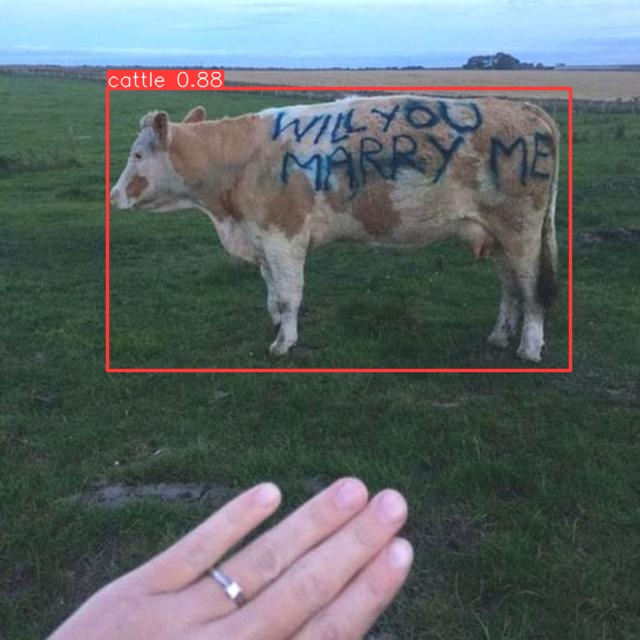

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")